In [15]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
## load data
data = pd.read_csv("201502-citibike-tripdata.csv")

# Data Description

In [29]:
data.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,weekday
count,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,194663.000000,196930.000000,196930.000000
mean,649.383207,438.669949,40.735784,-73.990074,438.540695,40.735530,-73.990391,18120.012278,1975.288031,1.156203,2.922703
std,873.231710,321.320871,0.018569,0.011522,321.595789,0.018480,0.011508,2074.916613,11.734009,0.393946,1.754617
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14530.000000,1899.000000,0.000000,0.000000
25%,340.000000,307.000000,40.723684,-73.997901,307.000000,40.723627,-73.998102,16338.000000,1967.000000,1.000000,2.000000
50%,507.000000,417.000000,40.737815,-73.990093,415.000000,40.737262,-73.990697,18089.000000,1977.000000,1.000000,3.000000
75%,764.000000,491.000000,40.750380,-73.981854,491.000000,40.750200,-73.981923,19886.000000,1985.000000,1.000000,4.000000
max,43016.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21703.000000,1999.000000,2.000000,6.000000


###We chose the February 2015 dataset. For the tripduration, there is the total 196930 data, and the mean is 649.383207. The standard deviation is 873.23171. 

#Idea 
###There is a difference in trip durations between weekdays and weekends.
The traffic volume during the weekdays and weekends is significantly different in New York City. Several different factors vary between weekdays and weekends and influence trip duration data. There might be a significant difference between weekdays and weekends Citibike trip duration.

In [18]:
## explore data
data['date'] = pd.to_datetime(data['starttime'])
data['weekday'] = data['date'].dt.weekday
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weekday
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2,2015-02-01 00:00:00,6
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1,2015-02-01 00:00:00,6
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2,2015-02-01 00:01:00,6
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2,2015-02-01 00:01:00,6
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1,2015-02-01 00:01:00,6


# Data Manipulation
###Using the 'date' to change to the weekdays and weekend, we assigned the first five days to weekdays and the rest two days to weekend.

In [19]:
def wky2wkd():
    # generate weekday data    
    n = 5 
    weekday = pd.Series()
    for i in range(n):
        d = data['tripduration'][data['weekday']==i]
        weekday = weekday.append(d)
    # generate weekend data 
    m = 2
    weekend = pd.Series()
    for j in range(m):
        d = data['tripduration'][data['weekday']==j+5]
        weekend = weekend.append(d)
    # remove outlier
    weekday1 = weekday[~((weekday-weekday.mean()).abs()>3*weekday.std())]
    weekend1 = weekend[~((weekend-weekend.mean()).abs()>3*weekend.std())]
    return weekday1, weekend1

### Caldulate mean difference between weekday and weekend

In [20]:
wky1, wkd1 = wky2wkd()

print 'Weekday Mean :%.2f' %(wky1.mean())   
print 'Weekwned Mean :%.2f' %(wkd1.mean())
print "Effect size:%.2f" %(wky1.mean() - wkd1.mean())

Weekday Mean :614.01
Weekwned Mean :617.71
Effect size:-3.69


### Visualize histogram plot of the two samples

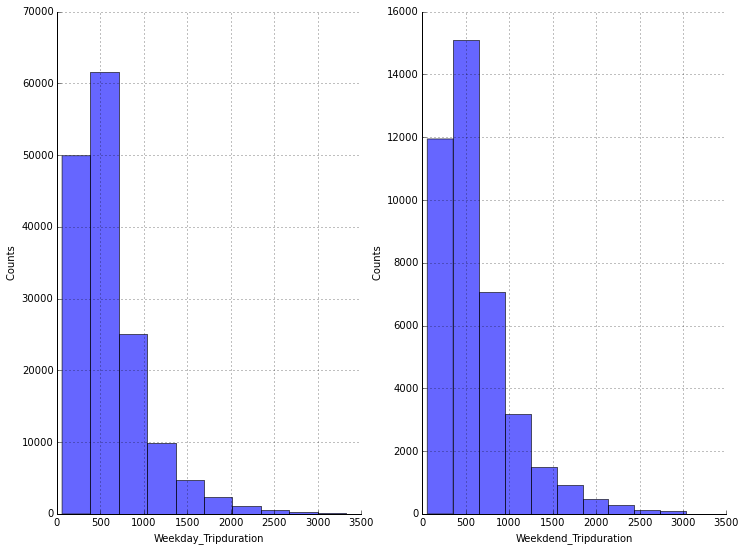

In [30]:
#Plot distributions of tripduration in weekday and weekend seperately.
plt.figure(figsize=(12, 9)) 
ax1 = plt.subplot(1,2,1) 
ax1.spines["top"].set_visible(False)  ## set the top frame invisible
ax1.spines["right"].set_visible(False) ## set the right frame invisible
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
plt.xlabel('Weekday_Tripduration',fontsize=10)
plt.ylabel('Counts ',fontsize=10)
wky1.hist(alpha=0.6)

ax2 = plt.subplot(1,2,2) 
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False) 
ax2.get_xaxis().tick_bottom()  
ax2.get_yaxis().tick_left()  
plt.xlabel('Weekdend_Tripduration',fontsize=10)
plt.ylabel('Counts ',fontsize=10)
wkd1.hist(alpha=0.6)

### Comment
From the two histograms above we can observe that the two distributions look very similar except for sample size, indicating there aren't much difference for bikers' behavior between weekday and weekend in February. A potential guess is that people are not willing to going out by bike because of the bad weather condition in winter despite whether on weekday or weekend.

#Question: Are trip durations during weekdays significantly higher than weekends?

##Testable hypothesis: 
###Null hypothesis: Mean trip durations aren't significantly different
###$H_0: mean_1 - mean_2 = $0
    
###$H_a: mean_1 - mean_2 \neq $0

## Confidence Interval: alpha = 0.05

Becasue we compare the means of the trip duration in weekdays and weekend, and we do not have the values for the population variances. We choose the t-test to examine our null hypothesis.

Perform t-test and determine the p-value.

In [26]:
## t-test
stats.ttest_ind(wky1,wkd1)

(-1.6182577908340412, 0.10560866093596753)

We get the p-value is 0.106, this number is larger than 0.05; so we fail to reject to the null hypothesis and concluded that there are no significant differences for the trip duration means between weekdays and weekend.

## Shapiro test for normal distribution

T-test one assumption is that the data used came from a normal distribution. 

The Shapiro test is a test of normality in frequentist statistics.The null hypothesis of this test is that the population is normally distributed. If p-value is more than 0.05, we can be 95% certain that data are normally disributed. In orther words, the null hypothesis is probably true. If p-value is less than 0.05, we can be 95% certain that the data not normally distributed. That is, the null hypothesis is probably false. 

In [27]:
stats.shapiro(wky1)

/Users/ianina/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:997: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8409476280212402, 0.0)

In [28]:
stats.shapiro(wkd1)

(0.8357008099555969, 0.0)

Thus, two p-values are less than 0.05, meaning that there is no the nomal distribution. However, this result violates the assumation that sample size needed for the distribution of means to approximate normality depends on the degree of non-normality of the population. We recommend to use a nonparametric test that tests the null hypothesis.

##Brown-Mood Median Test
Given the fact that we fail the normality assumption of the model, it seems that a t-test is not a good idea to examine the relationship between the two samples. Therefor, we introduce the Brown-Mood Median test, a nonparametirc test, to compare the two distributions (weekday vs. weekend) by testing that the two samples come from populations with the same median. The null hypothesis and alternative hypothesis are listed as follows.
###$H_0: med_1 - med_2 = $0
    
###$H_a: med_1 - med_2 \neq $0  

In [22]:
from scipy.stats import median_test
stat, p, med, tbl = median_test(wky1,wkd1)

In [23]:
tbl

array([[78054, 19958],
       [77461, 20673]])

In [24]:
print 'P-value<0.05?: %s' %(p<0.05)

P-value<0.05?: True


### Comment
Since the p-value is smaller than the significant level, we reject the null hypothesis that the medians of the two samples are the same. We conclude that the median trip duration for weekday and weekend are significant different.